In [17]:
## Importing the packages
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the CSV file into pandas dataframe
Auto_Sales = pd.read_excel('Sales_Data (1).xlsx')

In [3]:
#checking the head(top 5 rows) of the data frame
Auto_Sales.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


### BASIC EDA

In [4]:
## Checking the number of rows and columns
Auto_Sales.shape

(2747, 20)

In [5]:
#checking the data types /information
Auto_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

- The data has 2747 instances with 19 attributes with 1 of type date time, 5 integer type, 2 float type and rest 12 are integer type.

In [6]:
#checking for missing values
Auto_Sales.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [7]:
# Are there any duplicates
dups = Auto_Sales.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
Auto_Sales[dups]

Number of duplicate rows = 0


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


In [8]:
# five point summary of the continuous attributes
Auto_Sales.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


-
-
-
-
-
-
-


### unique values for categorical variables

In [9]:
for column in Auto_Sales.columns:
    if Auto_Sales[column].dtype == 'object':
        print(column.upper(),': ',Auto_Sales[column].nunique())
        print(Auto_Sales[column].value_counts().sort_values())
        print('\n')

STATUS :  6
Disputed        14
In Process      41
On Hold         44
Resolved        47
Cancelled       60
Shipped       2541
Name: STATUS, dtype: int64


PRODUCTLINE :  7
Trains               77
Ships               230
Trucks and Buses    295
Planes              304
Motorcycles         313
Vintage Cars        579
Classic Cars        949
Name: PRODUCTLINE, dtype: int64


PRODUCTCODE :  109
S18_1749    21
S18_2248    21
S24_3969    21
S18_4409    21
S18_4933    22
            ..
S32_2509    28
S24_2840    28
S50_1392    28
S24_1444    28
S18_3232    51
Name: PRODUCTCODE, Length: 109, dtype: int64


CUSTOMERNAME :  89
Boards & Toys Co.                 3
Atelier graphique                 7
Royale Belge                      8
Auto-Moto Classics Inc.           8
Microscale Inc.                  10
                               ... 
AV Stores, Co.                   51
La Rochelle Gifts                53
Australian Collectors, Co.       55
Mini Gifts Distributors Ltd.    180
Euro Shopping Ch

In [10]:
#correlation matrix
Auto_Sales.corr()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397092,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000


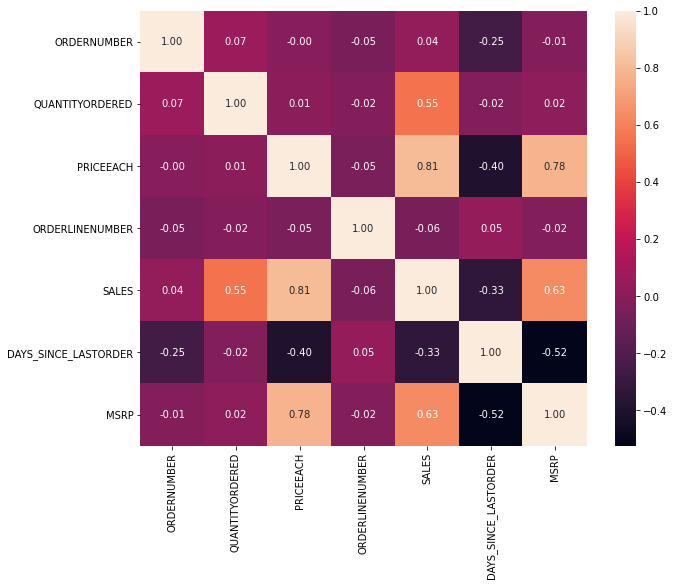

In [12]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(Auto_Sales.corr(),annot=True,fmt=".2f")
plt.show()

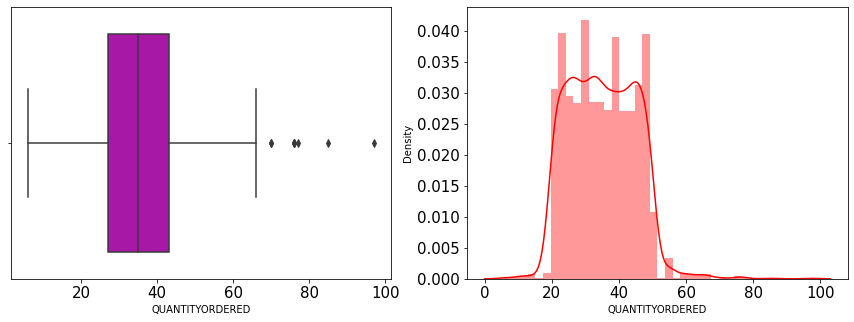

In [24]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='QUANTITYORDERED',data=Auto_Sales,orient='v',ax=ax1,color='m')
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(Auto_Sales['QUANTITYORDERED'],ax=ax2,color='r')
ax2.tick_params(labelsize=15)


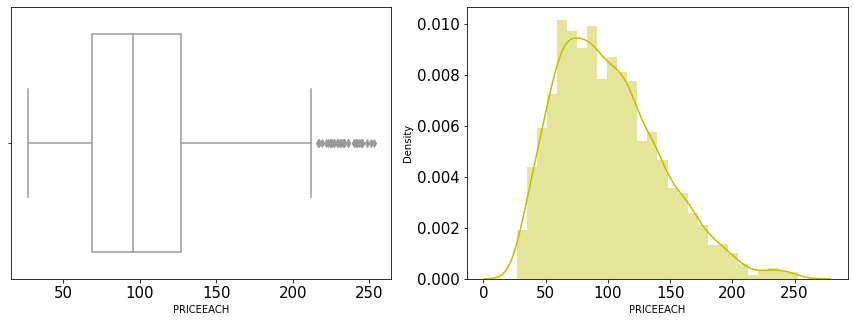

In [25]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='PRICEEACH',data=Auto_Sales,orient='v',ax=ax1,color='1')
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(Auto_Sales['PRICEEACH'],ax=ax2,color='y')
ax2.tick_params(labelsize=15)


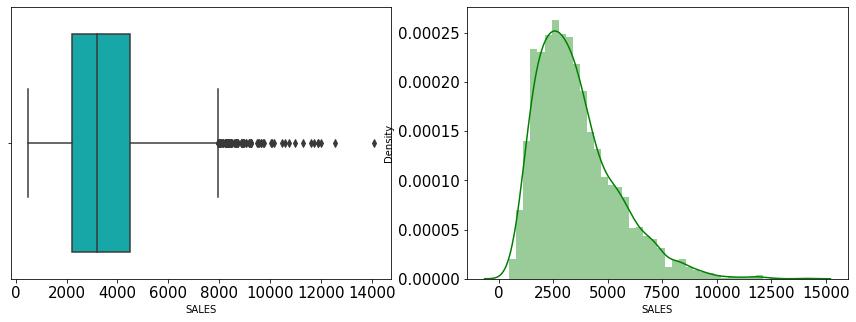

In [26]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplo
sns.boxplot(x='SALES',data=Auto_Sales,orient='v',ax=ax1,color='c')
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(Auto_Sales['SALES'],ax=ax2,color='g')
ax2.tick_params(labelsize=15)


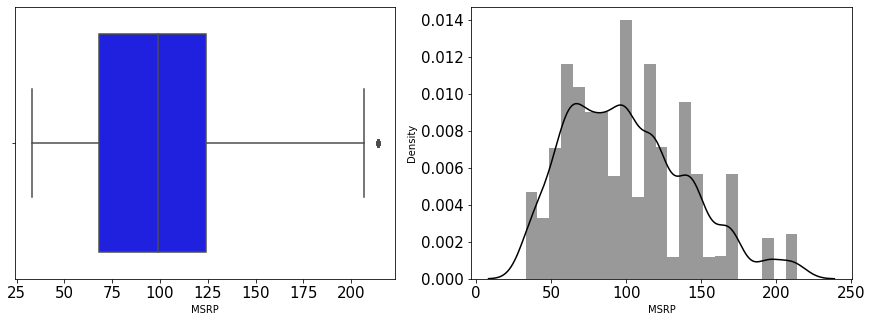

In [27]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='MSRP',data=Auto_Sales,orient='v',ax=ax1,color='b')
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(Auto_Sales['MSRP'],ax=ax2,color='0')
ax2.tick_params(labelsize=15)
